# Manual Annotation

## Setup
Napari uses Qt for Graphical User Interface (GUI) so we must first create the Qt application before we can get started.

In [1]:
%gui qt

We then import napari and the nbscreenshot utility, and instantiate an empty viewer.

In [2]:
import napari
from napari.utils import nbscreenshot

# Create an empty viewer
viewer = napari.Viewer()

We now load the data to annotate directly into napari using out builtin plugin reader. (This can load 3D data.)

In [5]:
viewer.open('../data/hist_data/example.tif', plugin='napari');

# Note: (UserWarning) The "builtins" plugin name is deprecated and will not work in a future version. Please use "napari" instead.

Remember that we can always take a screenshot of the viewer using the nbscreenshot utility.

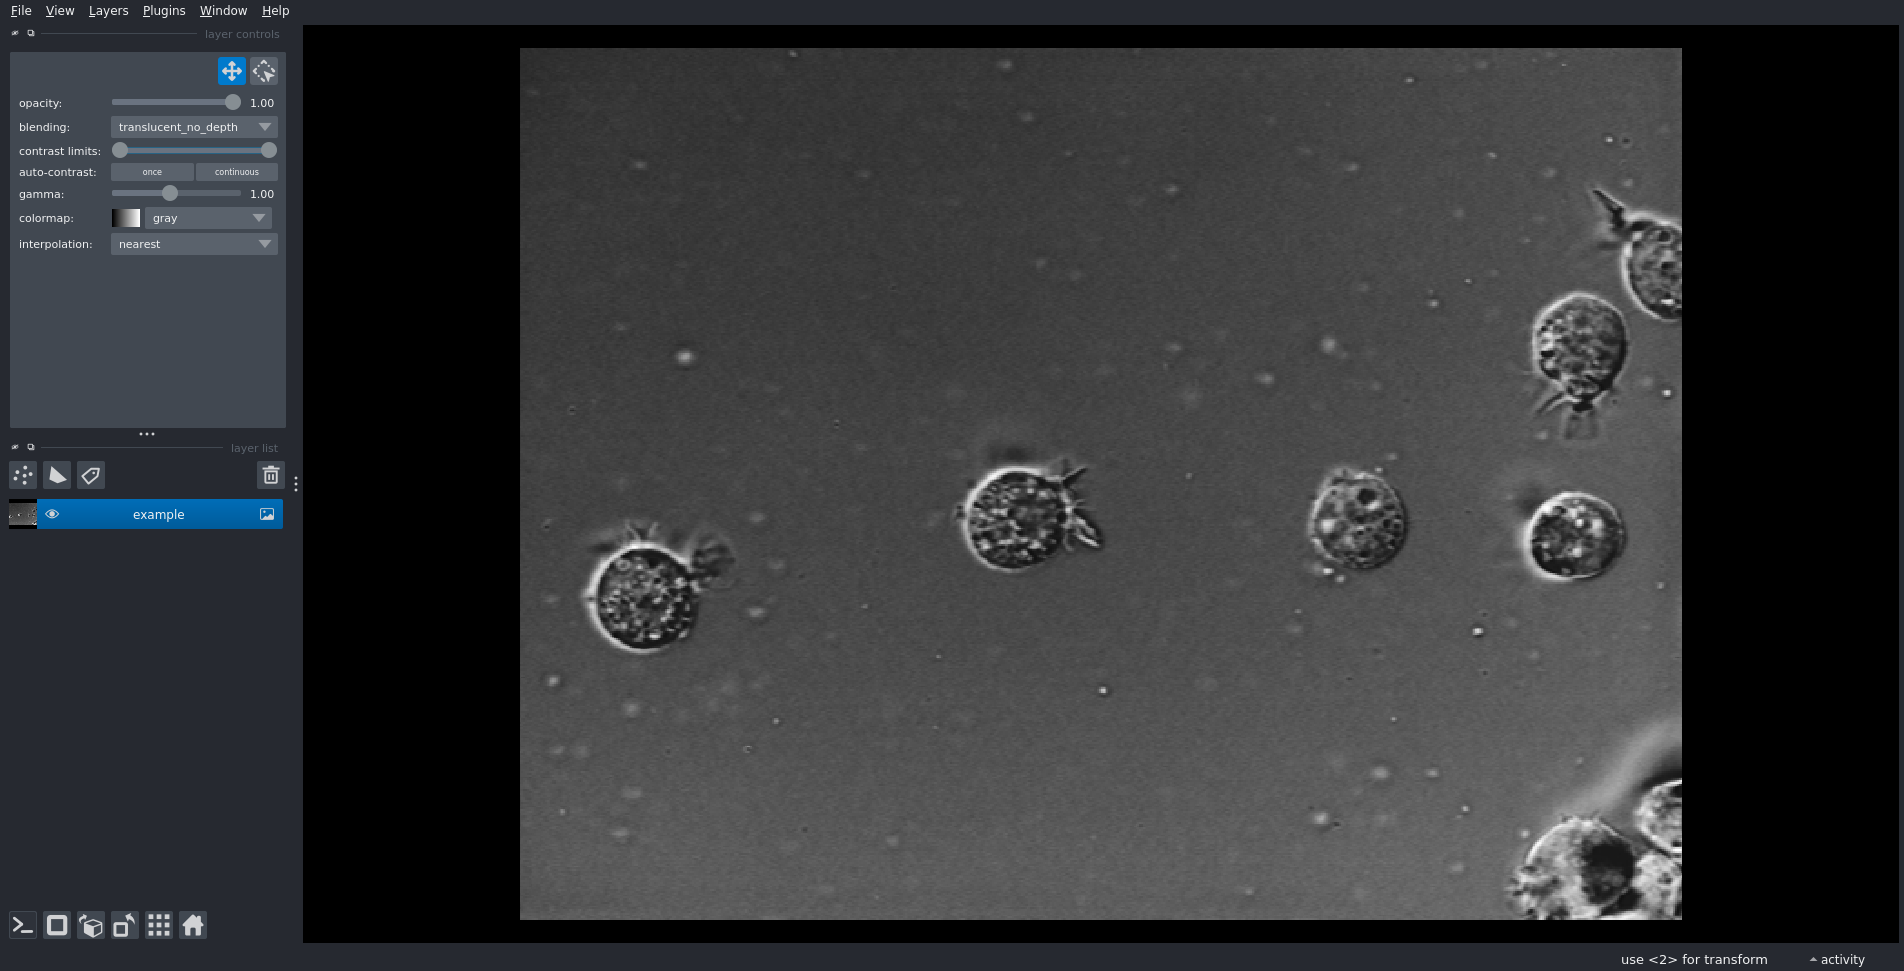

In [6]:
nbscreenshot(viewer)

## Painting labels for pixel-wise annotations
We have three basic options for annotating the data:
1. Using a points layer to identify discrete landmarks (they can be of different types);
2. Using a shapes layer to draw arbitrary polygons on the image;
3. Using a labels layer to manually paint labels on the image.

We will focus on the third option, since it's the appropriate choice for annotating pixel-wise labels.

With the labels layer we can now make pixel-wise annotaions using a paintbrush, fill bucket, and eraser tools (see the row of buttons in the control panel in the top left of the viewer).

Using these tools we can touch up any of the labels that we got from our polygon masks or draw entirely new ones.

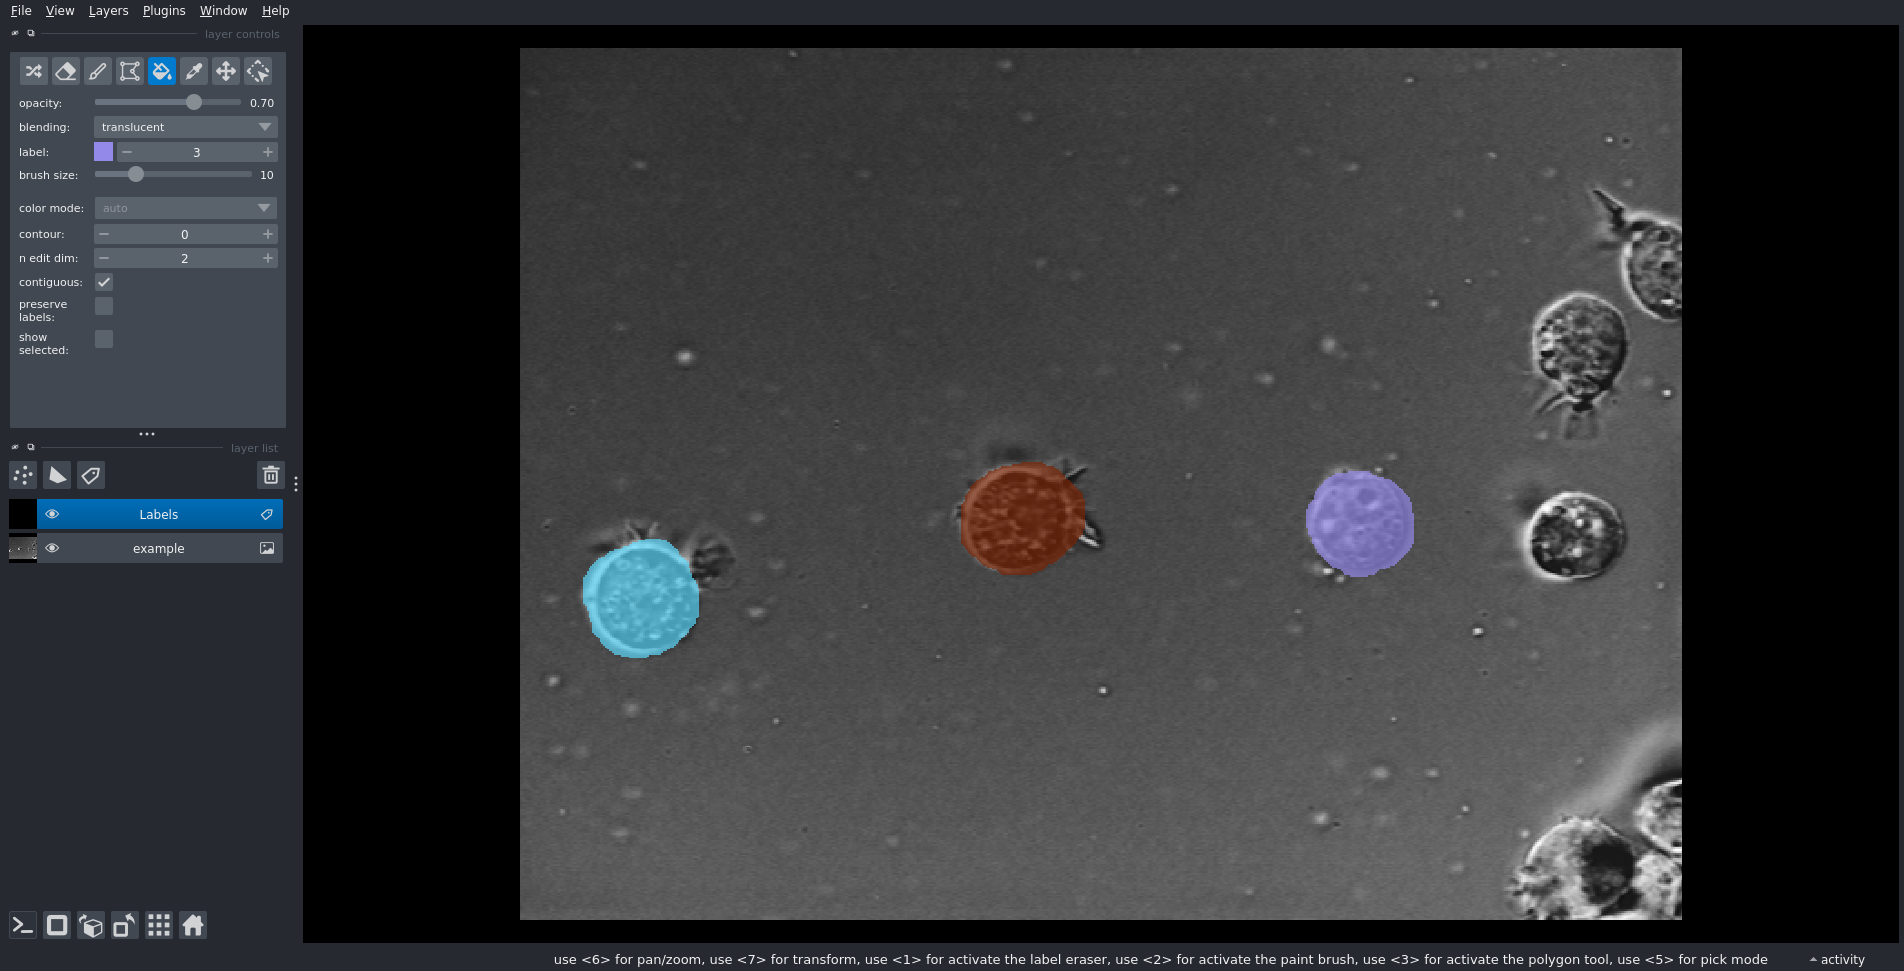

In [7]:
nbscreenshot(viewer)

We can save out these labels to image formats like `tif` using our builtin plugin writer.

In [8]:
# We can check the layer names by doing
print(viewer.layers)

[<Image layer 'example' at 0x78dea4ff35f0>, <Labels layer 'Labels' at 0x78dea353c5f0>]


In [9]:
# Save out the nuclei labels as a tiff file
viewer.layers['Labels'].save('../data/hist_data/example-labels.tif', plugin='napari');

### Making Corrections
If we had to make corrections to an already saved annotation, we could load it back into the viewer, even with a different name to be able to compare the original annotation and our corrections.

In [10]:
# Note that the cell labels could be reloaded into the viewer as follows
viewer.open('../data/hist_data/example-labels.tif', name='saved cells', plugin='napari');

viewer.layers['Labels'].visible = False

### Extracting a layer's data

In [14]:
# additional imports
from pathlib import Path
import napari
from skimage.io import imread
from skimage.io import imsave
import numpy as np
from magicgui import magicgui

In [11]:
layer = viewer.layers[1]  # Replace with the correct index if your image layer isn't at 1
print(layer.data)
print("Data shape:", layer.data.shape)
# print("Name:", layer.name)
# print("Visible:", layer.visible)
# print("Opacity:", layer.opacity)
# print("Colormap:", layer.colormap)
# print("Scale:", layer.scale)
# print("Translate:", layer.translate)
# print("Metadata:", layer.metadata)
# print("Blending mode:", layer.blending)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Data shape: (480, 640)


In [12]:
# Access the data in viewer.layers[1]
layer_data = viewer.layers[1].data

# Get unique values
unique_values = np.unique(layer_data)

print("Unique values:", unique_values)

Unique values: [0 1 2 3]


We can also view these properties, even if the layer is not loaded into the viewer.

In [15]:
# LOADING SAVED ANNOTATIONS
# Define the path to the image file
hist_data_dir = Path('../data/hist_data')
labels_filename = 'example-labels.tif'
image_path = hist_data_dir / labels_filename  # Path to sample histology image

# Load the image using Path, which skimage.io.imread can accept as an argument directly
labels = imread(image_path)

print(labels)
print(labels.shape)
print(labels.dtype)
print(labels.max())
print(labels.min())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(480, 640)
uint32
3
0
